In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


# EDA (Exploratory Data Analysis)
다양한 각도에서 데이터를 관찰하고 이해하는 과정입니다. 데이터의 이해도가 높아지면서 숨겨진 의미를 발견하고 잠재적인 문제를 미리 발견할 수 있습니다. 이를 바탕으로 데이터를 보완하거나 기존의 가설을 수정할 수 있습니다. 

<div class="alert alert-block alert-success">
    <b>목표</b> : 주택가격과 관련 있는 Factor를 찾는다. 
</div>

데이터를 1) 전처리한 후 분포를 2) 시각화하고 3) 다양한 기준으로 주택 가격을 분석해 보세요.
- 데이터를 분류한 근거를 글로 남겨주세요.

데이터 살펴보기

In [108]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
pip install xlrd==1.2.0

     |████████████████████████████████| 103 kB 21.7 MB/s 
  Attempting uninstall: xlrd
    Found existing installation: xlrd 1.1.0
    Uninstalling xlrd-1.1.0:
      Successfully uninstalled xlrd-1.1.0


In [58]:
!sudo apt-get install -y fonts-nanum
!sudo fc-cache -fv
!rm ~/.cache/matplotlib -rf

Reading package lists... Done
Building dependency tree       
Reading state information... Done
The following NEW packages will be installed:
  fonts-nanum
0 upgraded, 1 newly installed, 0 to remove and 39 not upgraded.
Need to get 9,604 kB of archives.
After this operation, 29.5 MB of additional disk space will be used.
Get:1 http://archive.ubuntu.com/ubuntu bionic/universe amd64 fonts-nanum all 20170925-1 [9,604 kB]
Fetched 9,604 kB in 0s (37.6 MB/s)
debconf: unable to initialize frontend: Dialog
debconf: (No usable dialog-like program is installed, so the dialog based frontend cannot be used. at /usr/share/perl5/Debconf/FrontEnd/Dialog.pm line 76, <> line 1.)
debconf: falling back to frontend: Readline
debconf: unable to initialize frontend: Readline
debconf: (This frontend requires a controlling tty.)
debconf: falling back to frontend: Teletype
dpkg-preconfigure: unable to re-open stdin: 
Selecting previously unselected package fonts-nanum.
(Reading database ... 155455 files and di

In [14]:
import matplotlib.pyplot as plt

plt.rc('font', family='NanumBarunGothic')

In [2]:
df = pd.read_excel('/content/drive/MyDrive/YearDream-2th/Project/Python_ToyProject/BostonHousing.xls')
df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV,CAT. MEDV
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0,0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6,0
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7,1
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4,1
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2,1


| 변수 | 설명 |
| ---- | ---- |
| CRIM | 1인당 범죄율 | 
| ZN | 25,000 평방피트를 초과하는 거주지역의 비율 | 
| INDUS | 비소매상업지역 면적 비율 |
| CHAS | 찰스강의 경계에 위치한 경우 1, 아니면 0 |
| NOX | 일산화질소 농도 | 
| RM | 방의 수 |
| AGE | 1940년 이전에 건축된 주택의 비율 |
| DIS | 직업센터까지의 접근성 지수 |
| RAD | 고속도로까지의 접근성 지수 |
| TAX | 재산세율 | 
| PTRATIO | 학생-교사 비율 |
| B | 흑인 비율 |
| LSTAT | 하위 계층 비율 | 
| MEDV | 본인 소유의 주택 가격 (중앙값), 단위 1,000$ |
| CAT.MEDV | MEDV가 30,000을 넘으면 1 아니면 0 |

 **`- 집값에 반영이 된다고 생각하는 컬럼!`**  
  
- CRIM
 - 범죄율이 높으면 당연히 뉴스에 자주 보도될 것  
 -> 그에따른 집값 하락 예상!

- RM
 - 기본적인 방의 면적을 생각하면 방의 수가 많아질수록 평수가 넓어진다  
  -> 그에따른 집값의 상향 예상!

- AGE
 - 기본적으로 건축물은 신축이 비싸므로 신축의 비율이 높을 수록 집값의 상승
  -> 신축의 비율이 높을 수록 평균 집값은 상향 예상!  

- CAT.MEDV
 - 소유 주택의 가격이 1인 사람이 많으면 당연히 평균 집값은 올라갈 수 밖에 없다!
 -> 따라서 집값 상승 예상!


  
**`- 집값에 반영이 안된다고 생각하는 컬럼!`**
- TAX
 - 보스턴의 집값에 다른 재산이 반영이 될까?  
 ex) 다 주택 보유자, 다른 재산에는 관심이 많지만 부동산에는 관심이 없는사람

- NOX
 - 일산화질소의 농도 측정 값이 실제 집값에 반영이 될까..?


In [46]:
# 생각과 맞는지 상관관계를 계산하여 상관계수를 확인합니다.

df.corr()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV,CAT. MEDV
CRIM,1.000000,-0.200469,0.406583,-0.055892,0.420972,-0.219247,0.352734,-0.379670,0.625505,0.582764,0.289946,-0.385064,0.455621,-0.388305,-0.151987
ZN,-0.200469,1.000000,-0.533828,-0.042697,-0.516604,0.311991,-0.569537,0.664408,-0.311948,-0.314563,-0.391679,0.175520,-0.412995,0.360445,0.365296
INDUS,0.406583,-0.533828,1.000000,0.062938,0.763651,-0.391676,0.644779,-0.708027,0.595129,0.720760,0.383248,-0.356977,0.603800,-0.483725,-0.366276
CHAS,-0.055892,-0.042697,0.062938,1.000000,0.091203,0.091251,0.086518,-0.099176,-0.007368,-0.035587,-0.121515,0.048788,-0.053929,0.175260,0.108631
NOX,0.420972,-0.516604,0.763651,0.091203,1.000000,-0.302188,0.731470,-0.769230,0.611441,0.668023,0.188933,-0.380051,0.590879,-0.427321,-0.232502
RM,-0.219247,0.311991,-0.391676,0.091251,-0.302188,1.000000,-0.240265,0.205246,-0.209847,-0.292048,-0.355501,0.128069,-0.613808,0.695360,0.641265
AGE,0.352734,-0.569537,0.644779,0.086518,0.731470,-0.240265,1.000000,-0.747881,0.456022,0.506456,0.261515,-0.273534,0.602339,-0.376955,-0.191196
DIS,-0.379670,0.664408,-0.708027,-0.099176,-0.769230,0.205246,-0.747881,1.000000,-0.494588,-0.534432,-0.232471,0.291512,-0.496996,0.249929,0.118887
RAD,0.625505,-0.311948,0.595129,-0.007368,0.611441,-0.209847,0.456022,-0.494588,1.000000,0.910228,0.464741,-0.444413,0.488676,-0.381626,-0.197924
TAX,0.582764,-0.314563,0.720760,-0.035587,0.668023,-0.292048,0.506456,-0.534432,0.910228,1.000000,0.460853,-0.441808,0.543993,-0.468536,-0.273687


/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 8722 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:183: RuntimeWarning: Glyph 8722 missing from current font.
  font.set_text(s, 0, flags=flags)


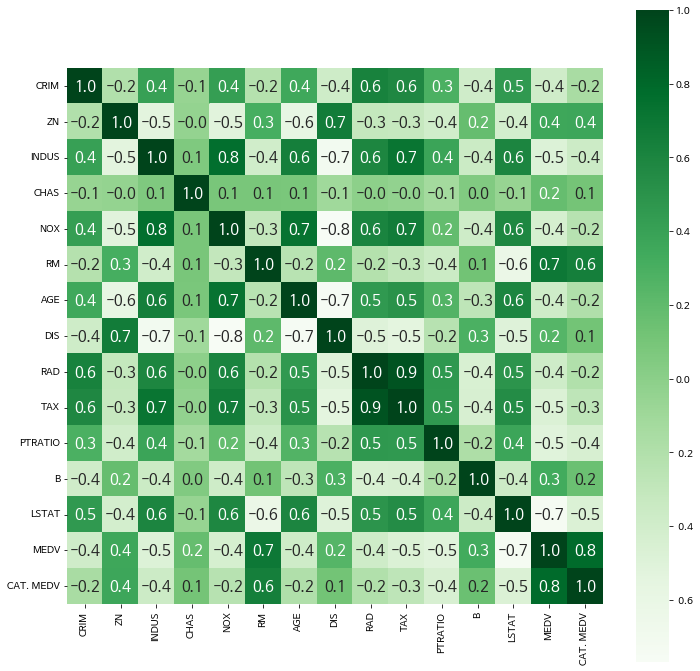

In [78]:
corr = df.corr()
plt.figure(figsize=(12,12))
sns.heatmap(corr, cbar=True, square= True, fmt='.1f', annot=True, annot_kws={'size':15}, cmap='Greens')

In [55]:
# MEDV 에 관한 상관 관계만 확인합니다.
df.corr().loc[ : ,"MEDV"]

CRIM        -0.388305
ZN           0.360445
INDUS       -0.483725
CHAS         0.175260
NOX         -0.427321
RM           0.695360
AGE         -0.376955
DIS          0.249929
RAD         -0.381626
TAX         -0.468536
PTRATIO     -0.507787
B            0.333461
LSTAT       -0.737663
MEDV         1.000000
CAT. MEDV    0.789789
Name: MEDV, dtype: float64

In [60]:
# 내림차순으로 정렬합니다.
df.corr().loc[ : ,"MEDV"].sort_values(ascending=False)

MEDV         1.000000
CAT. MEDV    0.789789
RM           0.695360
ZN           0.360445
B            0.333461
DIS          0.249929
CHAS         0.175260
AGE         -0.376955
RAD         -0.381626
CRIM        -0.388305
NOX         -0.427321
TAX         -0.468536
INDUS       -0.483725
PTRATIO     -0.507787
LSTAT       -0.737663
Name: MEDV, dtype: float64

`상관계수 정리` 
- CAT. MEDV    0.789789
- RM           0.695360
- PTRATIO     -0.507787
- LSTAT       -0.737663

나의 예상과 다르게 `PTRATIO(학생-교사 비율)` 과 `LSTAT(하위 계층 비율)`이  
`MEDV(집값)` 과 상관계수가 높음을 알 수 있었다.

## 데이터 타입과 결측값 확인하기

In [137]:
# Datatype 확인합니다.
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   CRIM       506 non-null    float64
 1   ZN         506 non-null    float64
 2   INDUS      506 non-null    float64
 3   CHAS       506 non-null    int64  
 4   NOX        506 non-null    float64
 5   RM         506 non-null    float64
 6   AGE        506 non-null    float64
 7   DIS        506 non-null    float64
 8   RAD        506 non-null    int64  
 9   TAX        506 non-null    int64  
 10  PTRATIO    506 non-null    float64
 11  B          506 non-null    float64
 12  LSTAT      506 non-null    float64
 13  MEDV       506 non-null    float64
 14  CAT. MEDV  506 non-null    int64  
 15  평수         506 non-null    object 
 16  건물노후화정도    506 non-null    object 
dtypes: float64(11), int64(4), object(2)
memory usage: 67.3+ KB


In [138]:
# 결측값의 개수 출력하기 => 잃어버린 결측값이 있나 확인합니다.
df.isnull().sum()

CRIM         0
ZN           0
INDUS        0
CHAS         0
NOX          0
RM           0
AGE          0
DIS          0
RAD          0
TAX          0
PTRATIO      0
B            0
LSTAT        0
MEDV         0
CAT. MEDV    0
평수           0
건물노후화정도      0
dtype: int64

In [139]:
df.notnull().sum()

CRIM         506
ZN           506
INDUS        506
CHAS         506
NOX          506
RM           506
AGE          506
DIS          506
RAD          506
TAX          506
PTRATIO      506
B            506
LSTAT        506
MEDV         506
CAT. MEDV    506
평수           506
건물노후화정도      506
dtype: int64

` 이상없음! `

## 데이터 분포 확인하기

| 변수 | 설명 |
| ---- | ---- |
| CRIM | 1인당 범죄율 | 
| ZN | 25,000 평방피트를 초과하는 거주지역의 비율 | 
| INDUS | 비소매상업지역 면적 비율 |
| CHAS | 찰스강의 경계에 위치한 경우 1, 아니면 0 |
| NOX | 일산화질소 농도 | 
| RM | 방의 수 |
| AGE | 1940년 이전에 건축된 주택의 비율 |
| DIS | 직업센터까지의 접근성 지수 |
| RAD | 고속도로까지의 접근성 지수 |
| TAX | 재산세율 | 
| PTRATIO | 학생-교사 비율 |
| B | 흑인 비율 |
| LSTAT | 하위 계층 비율 | 
| MEDV | 본인 소유의 주택 가격 (중앙값), 단위 1,000$ |
| CAT.MEDV | MEDV가 30,000을 넘으면 1 아니면 0 |

주택가격 (`MEDV`)과 관련 있는 Factor를 찾아보세요
- 대형 평수 vs 소형 평수
- 노후화 정도와 집값의 관계는?
- 직주근접?
- 찰스강뷰?
- 직장이 가까우면서 소형 평수인 부동산의 가격은?

<div class="alert alert-block alert-success">
<b>채점기준</b> <br>
<ul>
    <li>데이터를 3건이 상의 변수를 분석했는가? </li>
    <li>데이터를 분류한 기준을 논리적으로 정리했는가</li>       
    <li>데이터를 차트로 시각화했는가? </li>
    <li>결과를 분석해서 정리했는가? </li>       
    <li>심도있게 분석했는가? </li>     
</div>

In [163]:

df['MEDV'].unique()

array([24. , 21.6, 34.7, 33.4, 36.2, 28.7, 22.9, 27.1, 16.5, 18.9, 15. ,
       21.7, 20.4, 18.2, 19.9, 23.1, 17.5, 20.2, 13.6, 19.6, 15.2, 14.5,
       15.6, 13.9, 16.6, 14.8, 18.4, 21. , 12.7, 13.2, 13.1, 13.5, 20. ,
       24.7, 30.8, 34.9, 26.6, 25.3, 21.2, 19.3, 14.4, 19.4, 19.7, 20.5,
       25. , 23.4, 35.4, 31.6, 23.3, 18.7, 16. , 22.2, 33. , 23.5, 22. ,
       17.4, 20.9, 24.2, 22.8, 24.1, 21.4, 20.8, 20.3, 28. , 23.9, 24.8,
       22.5, 23.6, 22.6, 20.6, 28.4, 38.7, 43.8, 33.2, 27.5, 26.5, 18.6,
       20.1, 19.5, 19.8, 18.8, 18.5, 18.3, 19.2, 17.3, 15.7, 16.2, 18. ,
       14.3, 23. , 18.1, 17.1, 13.3, 17.8, 14. , 13.4, 11.8, 13.8, 14.6,
       15.4, 21.5, 15.3, 17. , 41.3, 24.3, 27. , 50. , 22.7, 23.8, 22.3,
       19.1, 29.4, 23.2, 24.6, 29.9, 37.2, 39.8, 37.9, 32.5, 26.4, 29.6,
       32. , 29.8, 37. , 30.5, 36.4, 31.1, 29.1, 33.3, 30.3, 34.6, 32.9,
       42.3, 48.5, 24.4, 22.4, 28.1, 23.7, 26.7, 30.1, 44.8, 37.6, 46.7,
       31.5, 31.7, 41.7, 48.3, 29. , 25.1, 17.6, 24

In [164]:
df['MEDV'].nunique()

229

# `대형평수 vs 소형평수`

집의 평수랑 관련있는 칼럼은 아래와 같이 예상해 볼 수 있다.
- RM
 - 기본적인 방의 면적을 생각하면 방의 수가 많아질수록 평수가 넓어진다.  
 >그에따른 집값의 상향 예상!

In [165]:
df['RM'].unique()

array([6.575, 6.421, 7.185, 6.998, 7.147, 6.43 , 6.012, 6.172, 5.631,
       6.004, 6.377, 6.009, 5.889, 5.949, 6.096, 5.834, 5.935, 5.99 ,
       5.456, 5.727, 5.57 , 5.965, 6.142, 5.813, 5.924, 5.599, 6.047,
       6.495, 6.674, 5.713, 6.072, 5.95 , 5.701, 5.933, 5.841, 5.85 ,
       5.966, 6.595, 7.024, 6.77 , 6.169, 6.211, 6.069, 5.682, 5.786,
       6.03 , 5.399, 5.602, 5.963, 6.115, 6.511, 5.998, 5.888, 7.249,
       6.383, 6.816, 6.145, 5.927, 5.741, 6.456, 6.762, 7.104, 6.29 ,
       5.787, 5.878, 5.594, 5.885, 6.417, 5.961, 6.065, 6.245, 6.273,
       6.286, 6.279, 6.14 , 6.232, 5.874, 6.727, 6.619, 6.302, 6.167,
       6.389, 6.63 , 6.015, 6.121, 7.007, 7.079, 6.405, 6.442, 6.249,
       6.625, 6.163, 8.069, 7.82 , 7.416, 6.781, 6.137, 5.851, 5.836,
       6.127, 6.474, 6.229, 6.195, 6.715, 5.913, 6.092, 6.254, 5.928,
       6.176, 6.021, 5.872, 5.731, 5.87 , 5.856, 5.879, 5.986, 5.613,
       5.693, 6.431, 5.637, 6.458, 6.326, 6.372, 5.822, 5.757, 6.335,
       5.942, 6.454,

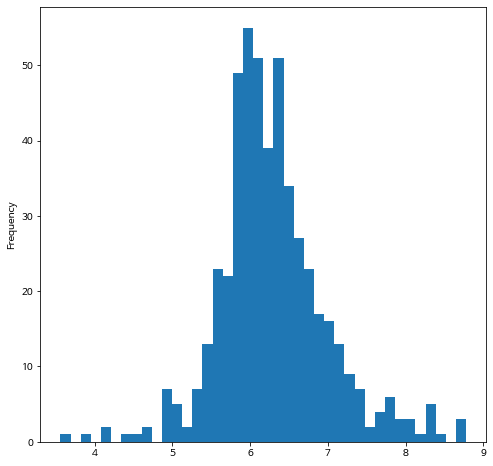

In [166]:
# 방의 개수에 따른 분포도를 확인합니다.
df['RM'].plot.hist( figsize=(8, 8), bins= 40)

In [167]:
# 'RM'의 평균을 계산합니다.
df_RM = df['RM']

df_RM.mean()

6.284634387351787

In [168]:
# 평수로 분류를 해봅시다.
# - 방 개수의 평균을 기준으로 소형평수 / 대형평수를 구분 지었습니다.
def func( self ):
    if self < df_RM.mean() :
        return "소형_평수"
    else :
        return "대형_평수"

df['평수'] = df['RM'].map(func)
df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV,CAT. MEDV,평수,건물노후화정도
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0,0,대형_평수,너무오래된와르르멘션
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6,0,대형_평수,너무오래된와르르멘션
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7,1,대형_평수,너무오래된와르르멘션
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4,1,대형_평수,구축
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2,1,대형_평수,구축


In [169]:
# 구분 지은 "소형_평수" / "대형_평수" 에 대한
# 각 집값의 평균을 도출합니다.
how = {
    "MEDV" : np.mean
}

MEDV_평수 = df.groupby('평수').agg(how)
MEDV_평수

,MEDV
평수,
대형_평수,27.417105
소형_평수,18.526978


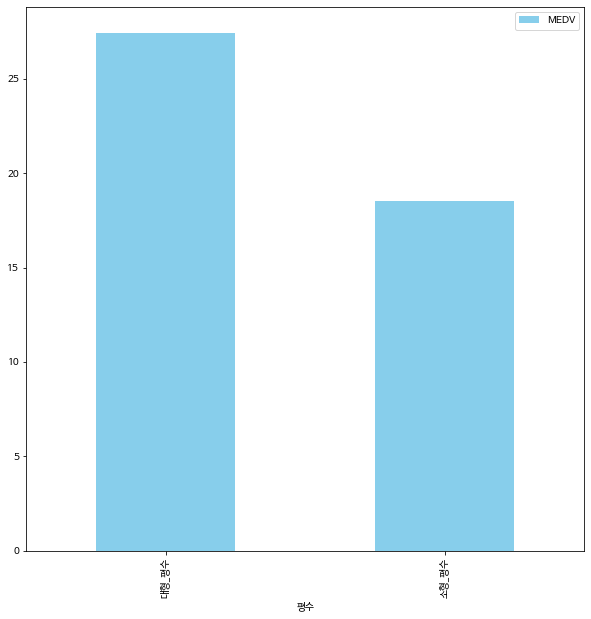

In [170]:
# 도출 해낸 소형_평수 / 대형_평수 를 시각화합니다.

MEDV_평수.plot.bar(figsize=(10, 10), color='skyblue')

In [171]:
# 평수 집값차를 출력합니다.

a = MEDV_평수.iloc[0, 0] 
b = MEDV_평수.iloc[1, 0]
평수집값차 = a - b
print(평수집값차)

8.89012684589171


`평수에 대한 비교 결과 도출`  
보스턴 주택 가격을 평수에 대해 비교해 본 결과  
`'MEDV'` 수치가 약 `**8.89012684589171**` 정도가 차이났다.

# `노후화 정도와 집값`

건물의 노후화 정도와 관련있는 칼럼은 아래와 같이 예상해 볼 수 있습니다.
- AGE
 - 1940년 이전에 건축된 주택의 비율이 높을수록 해당 지역의 건물(집)의 노후화 정도는 높다고 볼 수 있습니다.

In [172]:
df['AGE'].unique()

array([ 65.2,  78.9,  61.1,  45.8,  54.2,  58.7,  66.6,  96.1, 100. ,
        85.9,  94.3,  82.9,  39. ,  61.8,  84.5,  56.5,  29.3,  81.7,
        36.6,  69.5,  98.1,  89.2,  91.7,  94.1,  85.7,  90.3,  88.8,
        94.4,  87.3,  82. ,  95. ,  96.9,  68.2,  61.4,  41.5,  30.2,
        21.8,  15.8,   2.9,   6.6,   6.5,  40. ,  33.8,  33.3,  85.5,
        95.3,  62. ,  45.7,  63. ,  21.1,  21.4,  47.6,  21.9,  35.7,
        40.5,  29.2,  47.2,  66.2,  93.4,  67.8,  43.4,  59.5,  17.8,
        31.1,  36.8,  33. ,  17.5,   7.8,   6.2,   6. ,  45. ,  74.5,
        53.7,  33.5,  70.4,  32.2,  46.7,  48. ,  56.1,  45.1,  56.8,
        86.3,  63.1,  66.1,  73.9,  53.6,  28.9,  77.3,  57.8,  69.6,
        76. ,  36.9,  62.5,  79.9,  71.3,  85.4,  87.4,  90. ,  96.7,
        91.9,  85.2,  97.1,  91.2,  54.4,  81.6,  92.9,  95.4,  84.2,
        88.2,  72.5,  82.6,  73.1,  69.7,  84.1,  97. ,  95.8,  88.4,
        95.6,  96. ,  98.8,  94.7,  98.9,  97.7,  97.9,  98.4,  98.2,
        93.5,  93.6,

In [173]:
df['AGE'].nunique()

356

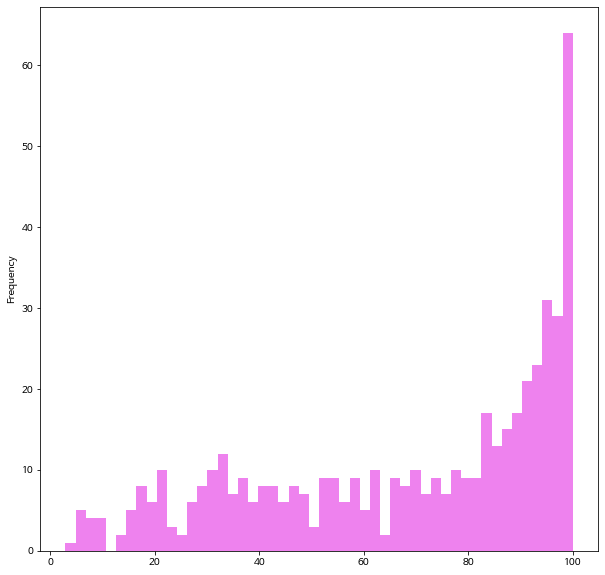

In [174]:
df['AGE'].plot.hist(figsize=(10, 10) , bins= 50, color = 'violet')

In [175]:
# 'AGE' 의 평균을 계산합니다.
df_AGE = df['AGE']

df_AGE.mean()

68.57490118577078

In [176]:
# 건물들의 평균 'AGE' 가 68.57490118577078 이므로
# 이번에는 최대 100을 기준으로 3구간을 나눠서
# 30 / 60  기점으로 
# "신축" / "구축" / "너무오래된와르르멘션" 으로 구분합니다.
def func( self ):
    if self < 30 :
        return "신축"
    elif self < 60 :
        return "구축"
    else :
        return "너무오래된와르르멘션"

df['건물노후화정도'] = df['AGE'].map(func)
df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV,CAT. MEDV,평수,건물노후화정도
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0,0,대형_평수,너무오래된와르르멘션
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6,0,대형_평수,너무오래된와르르멘션
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7,1,대형_평수,너무오래된와르르멘션
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4,1,대형_평수,구축
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2,1,대형_평수,구축


In [177]:
how = {
    "MEDV" : np.mean
}

MEDV_건물노후화정도 = df.groupby('건물노후화정도').agg(how)
MEDV_건물노후화정도

,MEDV
건물노후화정도,
구축,25.749587
너무오래된와르르멘션,20.353271
신축,27.382812


In [178]:
# 보기 편하게 내림차 순으로 변경합니다.
# 변경하고 결과를 다시 리턴해줍니다.
MEDV_건물노후화정도 = MEDV_건물노후화정도.sort_values('MEDV')
MEDV_건물노후화정도

,MEDV
건물노후화정도,
너무오래된와르르멘션,20.353271
구축,25.749587
신축,27.382812


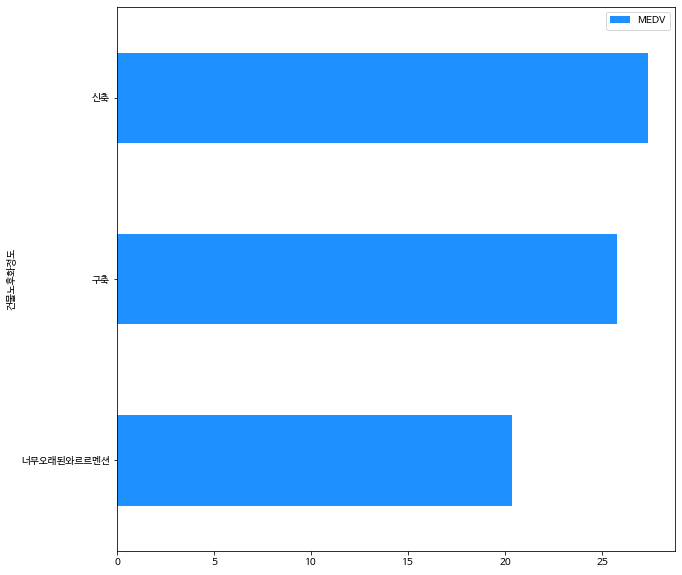

In [179]:
# 도출해낸 "MEDV_건물노후화정도"를 시각화를 합니다.

MEDV_건물노후화정도.plot.barh(figsize=(10,10), color='dodgerblue')

# `직주 접근성과 집값의 관계에 대해 알아봅시다.`
- 직주 접근성 : 직장과 주거지 간의 접근성
 - 해당데이터에서는 `'DIS'` 가 나타냄

In [180]:
df['DIS'].unique()

array([ 4.09  ,  4.9671,  6.0622,  5.5605,  5.9505,  6.0821,  6.5921,
        6.3467,  6.2267,  5.4509,  4.7075,  4.4619,  4.4986,  4.2579,
        3.7965,  3.7979,  4.0123,  3.9769,  4.0952,  4.3996,  4.4546,
        4.682 ,  4.4534,  4.4547,  4.239 ,  4.233 ,  4.175 ,  3.99  ,
        3.7872,  3.7598,  3.3603,  3.3779,  3.9342,  3.8473,  5.4011,
        5.7209,  5.1004,  5.6894,  5.87  ,  6.0877,  6.8147,  7.3197,
        8.6966,  9.1876,  8.3248,  7.8148,  6.932 ,  7.2254,  6.8185,
        7.2255,  7.9809,  9.2229,  6.6115,  6.498 ,  5.2873,  4.2515,
        4.5026,  4.0522,  4.0905,  5.0141,  5.4007,  4.7794,  4.4377,
        4.4272,  3.7476,  3.4217,  3.4145,  3.0923,  3.0921,  3.6659,
        3.615 ,  3.4952,  2.7778,  2.8561,  2.7147,  2.421 ,  2.1069,
        2.211 ,  2.1224,  2.4329,  2.5451,  2.6775,  2.3534,  2.548 ,
        2.2565,  2.4631,  2.7301,  2.7474,  2.4775,  2.7592,  2.2577,
        2.1974,  2.0869,  1.9444,  2.0063,  1.9929,  1.7572,  1.7883,
        1.8125,  1.9

In [181]:
df['DIS'].nunique()

412

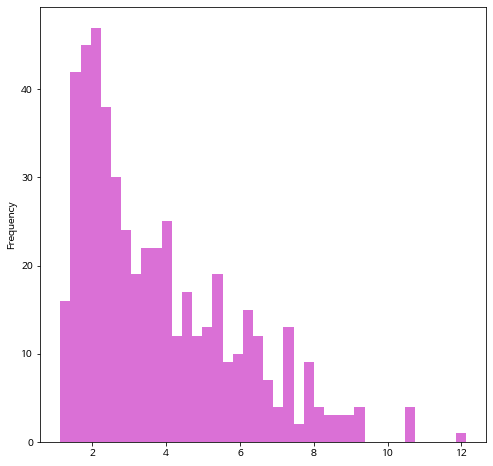

In [182]:
# 직주 접근성에 따른 분포도를 확인합니다.
df['DIS'].plot.hist( figsize=(8, 8), bins= 40, color = 'orchid')

In [183]:
# 'DIS'의 평균을 계산합니다.
df_DIS = df['DIS']

df_DIS.mean()

3.795042687747034

In [184]:
# 직주 접근성으로 분류를 해봅시다.
# - 직주 접근성의 평균을 기준으로 가깝다 / 멀다로 구분 지었습니다.
def func( self ):
    if self < df_DIS.mean() :
        return "가깝다"
    else :
        return "멀다"

df['직주접근성'] = df['DIS'].map(func)
df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV,CAT. MEDV,평수,건물노후화정도,직주접근성
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0,0,대형_평수,너무오래된와르르멘션,멀다
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6,0,대형_평수,너무오래된와르르멘션,멀다
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7,1,대형_평수,너무오래된와르르멘션,멀다
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4,1,대형_평수,구축,멀다
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2,1,대형_평수,구축,멀다


In [186]:
# 구분 지은 "가깝다" / "멀다" 에 대한
# "MEDV" 마다 평균을 도출합니다.
how = {
    "MEDV" : np.mean
}

MEDV_직주접근성 = df.groupby('직주접근성').agg(how)
MEDV_직주접근성

,MEDV
직주접근성,
가깝다,21.009732
멀다,24.714904


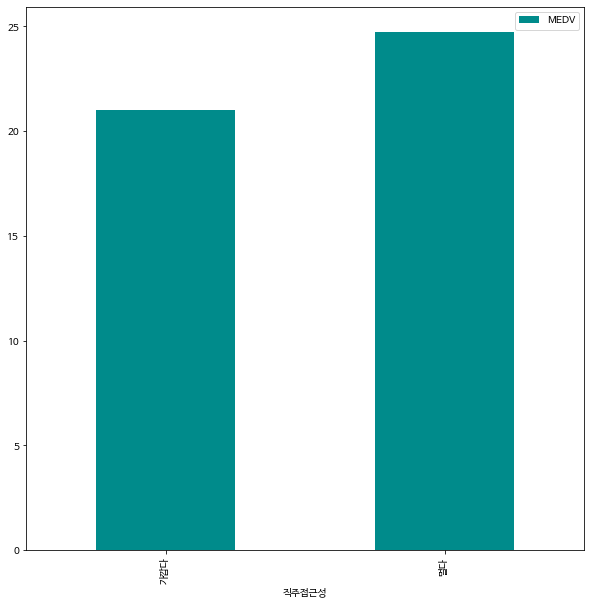

In [188]:
# 도출 해낸 "가깝다" / "멀다" 를 시각화합니다.

MEDV_직주접근성.plot.bar(figsize=(10, 10), color='darkcyan')

In [191]:
# 직주접근성집값차를 출력합니다.

a = MEDV_직주접근성.iloc[0, 0] 
b = MEDV_직주접근성.iloc[1, 0]
직주접근성집값차 = b - a
print(직주접근성집값차)

3.705172302529686


`직주 접근성에 대한 비교 결과 도출`  
보스턴 주택 가격을 직주 접근성에 대해 비교해 본 결과  
`'MEDV'` 수치가 약 `**3.705172302529686**` 정도가 차이났다.

# `방의 갯수는 많지만 직주 거리가 먼집 vs 방의 갯수는 적지만 가까운 집`



In [185]:
# 방의 갯수가 평균 이상이지만, 직주거리가 멀다.
# vs
# 방의 갯수가 평균 이하지만, 직주거리가 가깝다.

In [192]:
df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV,CAT. MEDV,평수,건물노후화정도,직주접근성
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0,0,대형_평수,너무오래된와르르멘션,멀다
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6,0,대형_평수,너무오래된와르르멘션,멀다
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7,1,대형_평수,너무오래된와르르멘션,멀다
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4,1,대형_평수,구축,멀다
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2,1,대형_평수,구축,멀다


In [195]:
def func( self ):
    if self < df_RM.mean():
        return "방 적음"
    else :
        return "방 많음"

df['방갯수'] = df['RM'].map(func)
df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV,CAT. MEDV,평수,건물노후화정도,직주접근성,방갯수
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0,0,대형_평수,너무오래된와르르멘션,멀다,방 많음
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6,0,대형_평수,너무오래된와르르멘션,멀다,방 많음
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7,1,대형_평수,너무오래된와르르멘션,멀다,방 많음
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4,1,대형_평수,구축,멀다,방 많음
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2,1,대형_평수,구축,멀다,방 많음


In [233]:
how = {
    'MEDV' : np.mean
}

MEDV_방갯수와직주접근성 = df.groupby(['방갯수', '직주접근성']).agg( how )
MEDV_방갯수와직주접근성

MEDV
방갯수  직주접근성           
방 많음 가깝다    25.845455
     멀다     29.194393
방 적음 가깝다    17.703955
     멀다     19.969307

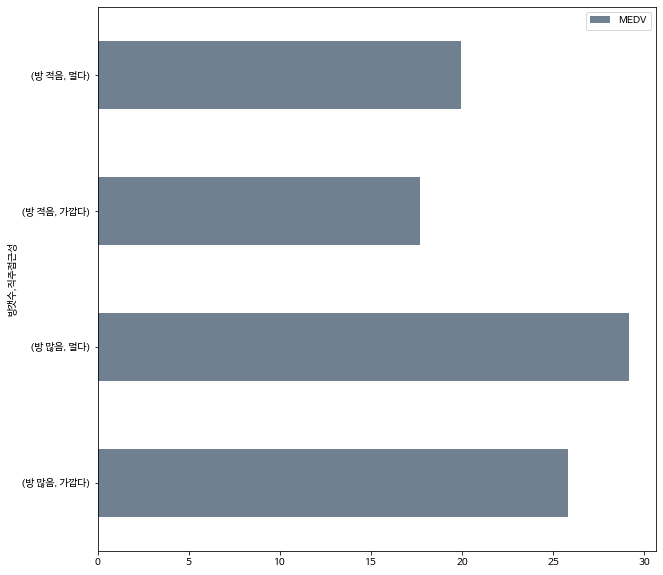

In [234]:
# 얻은 DataFrame 을 시각화 합니다.

MEDV_방갯수와직주접근성.plot.barh(figsize=(10, 10), color='slategray')

In [235]:
# 궁금했던 두개의 결과를 도출해보자.
# 많음 멀다
# 적음 가깝다

MEDV_방갯수와직주접근성
a = MEDV_방갯수와직주접근성.loc['방 많음',].loc['멀다', ]

In [236]:
MEDV_방갯수와직주접근성
b = MEDV_방갯수와직주접근성.loc['방 적음',].loc['가깝다', ]

In [237]:
print(a - b)

MEDV    11.490438
dtype: float64


`방의 갯수가 평균 이상이지만, 직주거리가 멀다. vs 방의 갯수가 평균 이하지만, 직주거리가 가깝다.에 대한 비교 결과 도출`   
`'MEDV'` 수치가 약 `**11.490438**` 정도가 차이났다.

# `비소매상업지역 면적 비율`과 `일산화질소 농도`와 `고속도로까지의 접근성`에 따른 `주택가격` 지수 비교
- 세가지를 비교하여 고속도로에서의 접근성과 일산화 질소의 농도가 주택가격에 영향을 얼마나 주는지 분석해봅니다.
- INDUS / MEDV (주택가격) /NOX (일산화질소 농도) / RAD (고속도로 접근성 지수)

| 변수 | 설명 |
| ---- | ---- |
| CRIM | 1인당 범죄율 | 
| ZN | 25,000 평방피트를 초과하는 거주지역의 비율 | 
| INDUS | 비소매상업지역 면적 비율 |
| CHAS | 찰스강의 경계에 위치한 경우 1, 아니면 0 |
| NOX | 일산화질소 농도 | 
| RM | 방의 수 |
| AGE | 1940년 이전에 건축된 주택의 비율 |
| DIS | 직업센터까지의 접근성 지수 |
| RAD | 고속도로까지의 접근성 지수 |
| TAX | 재산세율 | 
| PTRATIO | 학생-교사 비율 |
| B | 흑인 비율 |
| LSTAT | 하위 계층 비율 | 
| MEDV | 본인 소유의 주택 가격 (중앙값), 단위 1,000$ |
| CAT.MEDV | MEDV가 30,000을 넘으면 1 아니면 0 |


- MEDV (주택가격) /NOX (일산화질소 농도) / RAD (고속도로 접근성 지수)

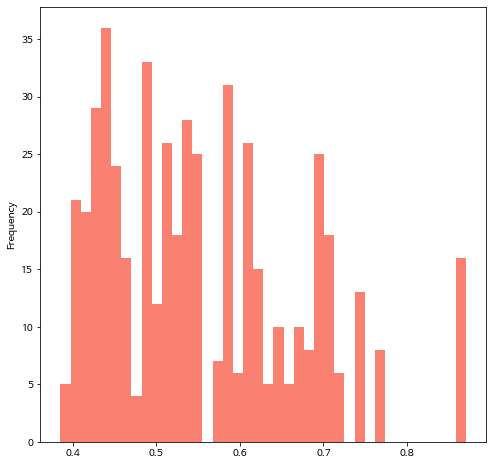

In [222]:
df['NOX'].plot.hist( figsize=(8, 8), bins= 40, color = 'salmon')

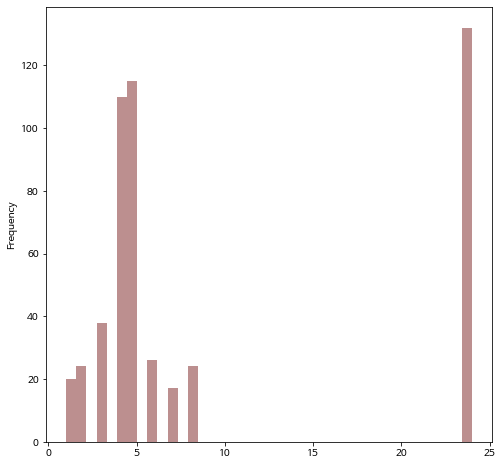

In [223]:
df['RAD'].plot.hist( figsize=(8, 8), bins= 40, color = 'rosybrown')

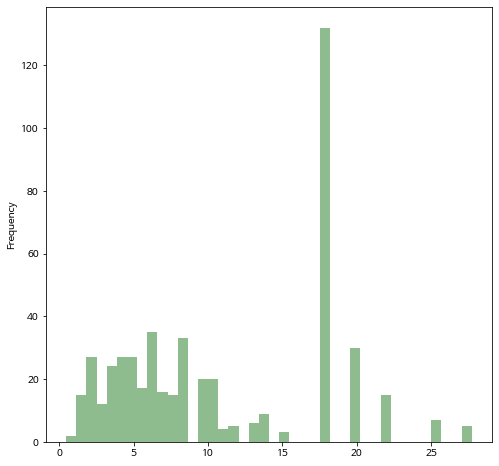

In [239]:
df['INDUS'].plot.hist( figsize=(8, 8), bins= 40, color = 'darkseagreen')

In [228]:
df_NOX = df['NOX']

df_NOX.mean()

0.5546950592885372

In [229]:
def func( self ):
    if self < df_NOX.mean() :
        return "일산화질소농도낮음"
    else :
        return "일산화질소농도높음"

df['일산화질소농도'] = df['NOX'].map(func)
df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV,CAT. MEDV,평수,건물노후화정도,직주접근성,방갯수,일산화질소농도
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0,0,대형_평수,너무오래된와르르멘션,멀다,방 많음,일산화질소농도낮음
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6,0,대형_평수,너무오래된와르르멘션,멀다,방 많음,일산화질소농도낮음
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7,1,대형_평수,너무오래된와르르멘션,멀다,방 많음,일산화질소농도낮음
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4,1,대형_평수,구축,멀다,방 많음,일산화질소농도낮음
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2,1,대형_평수,구축,멀다,방 많음,일산화질소농도낮음


In [230]:
df_RAD = df['RAD']

df_RAD.mean()

9.549407114624506

In [231]:
def func( self ):
    if self < df_RAD.mean() :
        return "고속도로 가깝다"
    else :
        return "고속도로 멀다"

df['고속도로접근성'] = df['RAD'].map(func)
df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,...,B,LSTAT,MEDV,CAT. MEDV,평수,건물노후화정도,직주접근성,방갯수,일산화질소농도,고속도로접근성
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,...,396.90,4.98,24.0,0,대형_평수,너무오래된와르르멘션,멀다,방 많음,일산화질소농도낮음,고속도로 가깝다
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,...,396.90,9.14,21.6,0,대형_평수,너무오래된와르르멘션,멀다,방 많음,일산화질소농도낮음,고속도로 가깝다
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,...,392.83,4.03,34.7,1,대형_평수,너무오래된와르르멘션,멀다,방 많음,일산화질소농도낮음,고속도로 가깝다
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,...,394.63,2.94,33.4,1,대형_평수,구축,멀다,방 많음,일산화질소농도낮음,고속도로 가깝다
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,...,396.90,5.33,36.2,1,대형_평수,구축,멀다,방 많음,일산화질소농도낮음,고속도로 가깝다


In [243]:
df_INDUS = df['INDUS']

df_INDUS.mean()

11.136778656126504

In [244]:
def func( self ):
    if self < df_INDUS.mean() :
        return "소매상업지역"
    else :
        return "비소매상업지역"

df['소매상업지역구분'] = df['INDUS'].map(func)
df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,...,LSTAT,MEDV,CAT. MEDV,평수,건물노후화정도,직주접근성,방갯수,일산화질소농도,고속도로접근성,소매상업지역구분
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,...,4.98,24.0,0,대형_평수,너무오래된와르르멘션,멀다,방 많음,일산화질소농도낮음,고속도로 가깝다,소매상업지역
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,...,9.14,21.6,0,대형_평수,너무오래된와르르멘션,멀다,방 많음,일산화질소농도낮음,고속도로 가깝다,소매상업지역
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,...,4.03,34.7,1,대형_평수,너무오래된와르르멘션,멀다,방 많음,일산화질소농도낮음,고속도로 가깝다,소매상업지역
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,...,2.94,33.4,1,대형_평수,구축,멀다,방 많음,일산화질소농도낮음,고속도로 가깝다,소매상업지역
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,...,5.33,36.2,1,대형_평수,구축,멀다,방 많음,일산화질소농도낮음,고속도로 가깝다,소매상업지역


In [245]:
how = {
    'MEDV' : np.mean
}

MEDV_일산화질소농도_고속도로_소매상업지역구분 = df.groupby(['일산화질소농도', '고속도로접근성', '소매상업지역구분']).agg( how )
MEDV_일산화질소농도_고속도로_소매상업지역구분

MEDV
일산화질소농도   고속도로접근성  소매상업지역구분           
일산화질소농도낮음 고속도로 가깝다 비소매상업지역   23.022222
                   소매상업지역    25.313869
          고속도로 멀다  비소매상업지역   22.620000
일산화질소농도높음 고속도로 가깝다 비소매상업지역   20.430645
                   소매상업지역    30.960000
          고속도로 멀다  비소매상업지역   16.159055

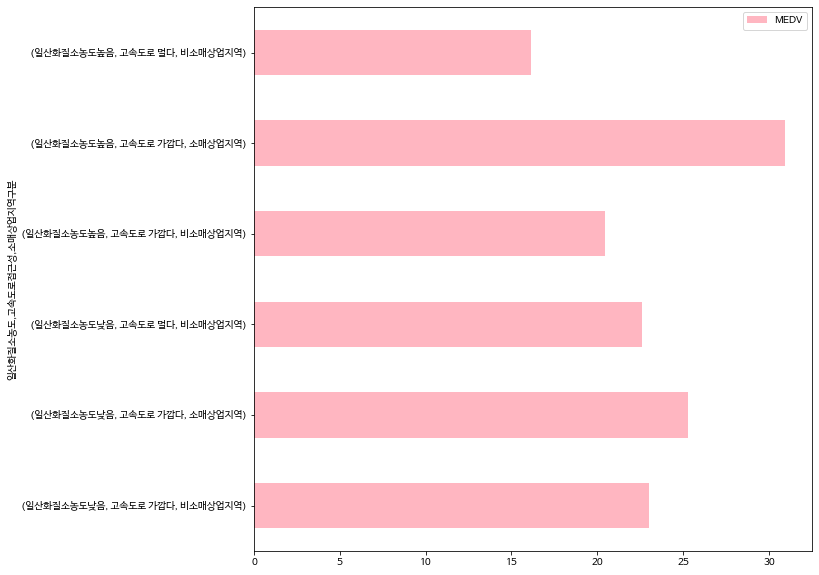

In [246]:
MEDV_일산화질소농도_고속도로_소매상업지역구분.plot.barh(figsize=(10, 10), color='lightpink')

`결론도출`  
-> 집값이 가장 싼 곳은 고속도로가 가까운 비상업지역이며 일산화질소 농도가 높다.  
-> 집값이 가장 비싼 곳은 고속도로 와 가까운 소매 상업지역이며 일산화 질소 농도가 높다.  


고속도로 접근성과 일산화 질소 농도는 상관계수를 봐도 ,  
여러 데이터에 대입해보아도 집값에 크게 영향을 주지 않는것같다.  
하지만, 상업지역의 구분은 큰 영향을 주는것으로 보인다.